In [1]:
import numpy as np
import matplotlib.pyplot as plt
from homework_functions import example_f, centered_diff, error_1, error_2, dat_reader
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Times New Roman'


In [2]:
# boundary conditions
left = (0,0)
right = (1,2)

In [3]:
# exact solution
exact_x, exact_u  = centered_diff(left, right, 10**4, example_f)

In [4]:
exact_x, exact_u = dat_reader('solutionA_N10000.dat')

In [5]:
# test

N_values = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
h_values = []
error1_values = []
error2_values = []

for N in N_values:
    x, u = centered_diff(left, right, N, example_f)
    h_values.append(1/(N+1))
    error1_values.append(float(error_1(x,u,exact_x, exact_u)))

    error2_values.append(float(error_2(x,u,exact_x, exact_u,N)))

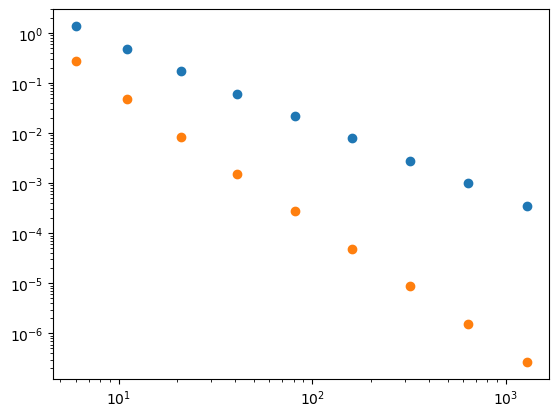

In [6]:
x_axis = [1/h for h in h_values]
plt.loglog(x_axis,error1_values, 'o', label = 'E')
plt.loglog(x_axis,error2_values, 'o', label = 'e')

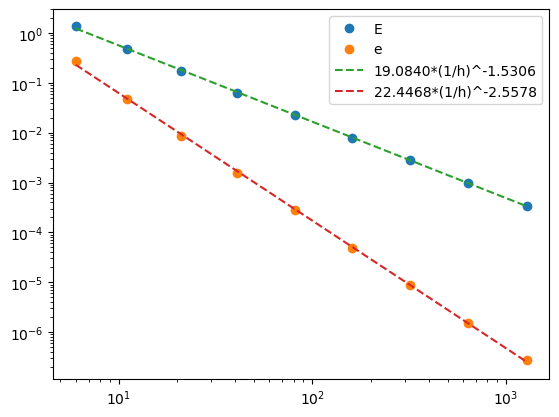

In [7]:
# curve_fiting
temp = x_axis
alpha_1, log_C_1 = np.polyfit(np.log(x_axis),np.log(error1_values), deg = 1)
alpha_2, log_C_2 = np.polyfit(np.log(x_axis),np.log(error2_values), deg = 1)

C_1 = np.exp(log_C_1)
C_2 = np.exp(log_C_2)

y1 = C_1 * np.power(x_axis,alpha_1)
y2 = C_2 * np.power(x_axis,alpha_2)

plt.loglog(x_axis,error1_values, 'o', label = 'E')
plt.loglog(x_axis,error2_values, 'o', label = 'e')
plt.loglog(x_axis,y1, '--', label = f'{C_1:.4f}*(1/h)^{alpha_1:.4f}')
plt.loglog(x_axis,y2,'--', label = f'{C_2:.4f}*(1/h)^{alpha_2:.4f}')

plt.legend()